In [8]:
import imp

svhn_images = imp.load_source('svhn_images', '../modules/svhn_images.py')

In [ ]:
#import matplotlib.image as mpimg
#import matplotlib.pyplot as plt
#import matplotlib.patches as patches
#from matplotlib.patches import Rectangle
#from PIL import Image
#%matplotlib inline



# Download SVHN and extract from label file

In [ ]:
import os

image_path='/mnt/sandbox/raw'
if not os.path.exists(image_path): 
    os.mkdir(image_path)

for data_kind in ['train', 'test']:
    print "Processing %s" % data_kind

    svhn_images.download_and_extract_SVHN(data_kind, image_path, '../data/SVHN/%s' % data_kind)

    print "Finished processing %s" % data_kind

# Data Exploration

In [2]:
image_path='/mnt/sandbox/raw'

image_counts = svhn_images.count_images_by_length(image_path, data_kind='train')

for k,v in image_counts.items():
    print "Number of %d-digit sequences=%d" %(k, v)

Number of 1-digit sequences=5137
Number of 2-digit sequences=18130
Number of 3-digit sequences=8691
Number of 4-digit sequences=1434
Number of 5-digit sequences=9
Number of 6-digit sequences=1


(27, 65, 3)
(111, 267, 3)
(99, 220, 3)
(49, 121, 3)
(163, 368, 3)
(20, 44, 3)
(37, 84, 3)
(43, 104, 3)
(44, 93, 3)
(107, 233, 3)


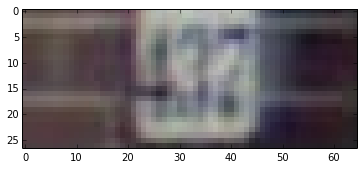

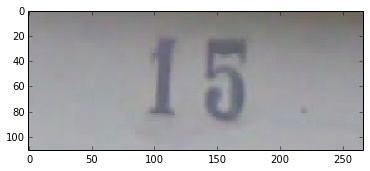

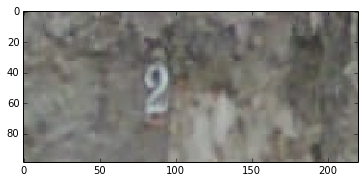

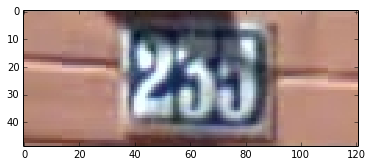

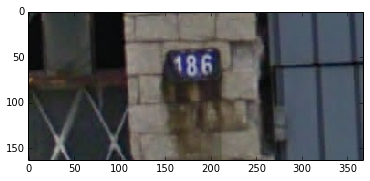

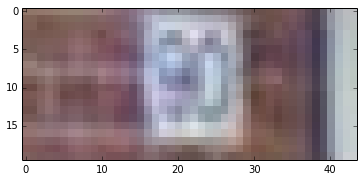

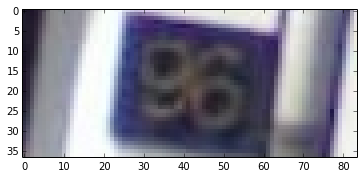

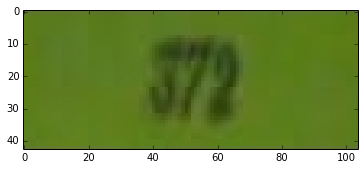

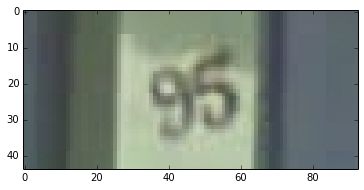

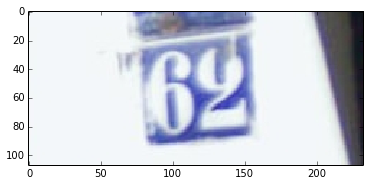

In [3]:
sample_of_images = svhn_images.get_list_of_filenames(image_path, data_kind='train', batch_size=10, max_sequence_length=3)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for f in [ "%s/images/%s/%s" % (image_path, 'train', png) for png in sample_of_images]:
    
    plt.figure()
    img = mpimg.imread(f)
    
    print img.shape
    plt.imshow(img, cmap='Greys', interpolation='nearest')

# Explore sample after image preprocessing

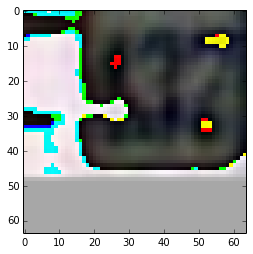

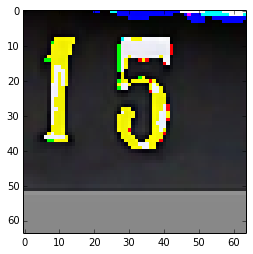

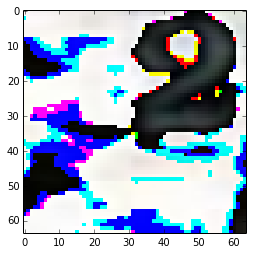

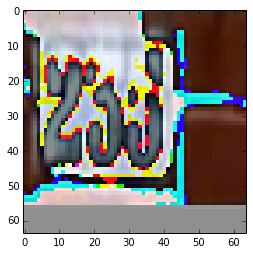

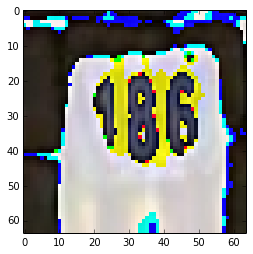

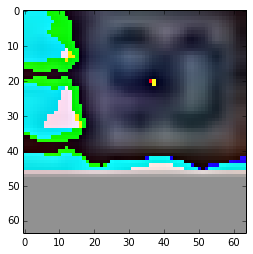

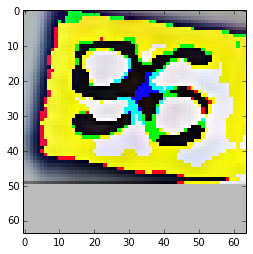

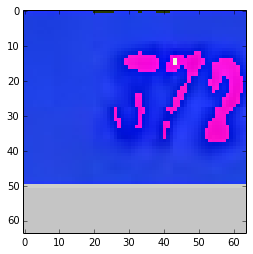

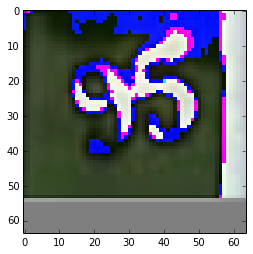

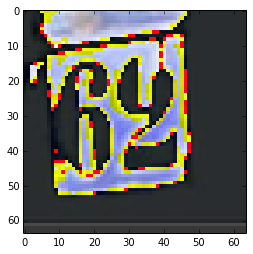

In [7]:
X, y1, y2, y3 = svhn_images.load_batch(sample_of_images, image_path, 'train', 10, 64, 3)

for i,_ in enumerate(sample_of_images):
    
    plt.figure()
    
    plt.imshow(X[i].reshape(64,64,3), cmap='Greys', interpolation='nearest')

In [9]:
model = imp.load_source('model', '../modules/model.py')
tf_graph = model.getGraph()
session = model.init_interactive_session(tf_graph)

In [10]:
model.load_saved_model('/flat2/saved_models/SVHN_3_digit_May7', session)